In [18]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
from sklearn.ensemble import RandomForestClassifier

In [19]:
df=pd.read_csv(r"C:\Users\vatch\Downloads\archive (37)\Telco_customer_churn_cleaned.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Streaming Music,Premium Tech Support,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Category
0,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Yes,0.0,0,20.94,129.09,1,Churned,Competitor
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Yes,0.0,0,18.24,169.89,2,Churned,Other
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,0.0,0,97.20,917.70,3,Churned,Other
3,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,0.0,0,136.92,3182.97,3,Churned,Other
4,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,0.0,0,2172.17,7208.47,1,Churned,Competitor


In [20]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'churn_rate', 'CLTV', 'Churn Reason', 'Count', 'Country', 'State',
       'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Age',
       'Under 30', 'Married', 'Referred a Friend', 'Number of Referrals',
       'Offer', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Streaming Music', 'Premium Tech Support', 'Unlimited Data',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score',
       'Customer Status', 'Churn Category'],
      dtype='object')


In [8]:
df = df.drop(columns=['CustomerID', 'Lat Long', 'Latitude', 'Longitude', 'Churn Reason'], errors='ignore')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Streaming Music,Premium Tech Support,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Category
0,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Yes,0.00,0,20.94,129.09,1,Churned,Competitor
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Yes,0.00,0,18.24,169.89,2,Churned,Other
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,0.00,0,97.20,917.70,3,Churned,Other
3,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,0.00,0,136.92,3182.97,3,Churned,Other
4,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,0.00,0,2172.17,7208.47,1,Churned,Competitor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No,No,No,19.31,0,1639.44,3039.53,5,Stayed,0
7039,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,48.23,0,865.20,2807.47,3,Stayed,0
7040,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,45.38,0,2135.52,9453.04,4,Stayed,0
7041,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Yes,27.24,0,0.00,319.21,4,Stayed,0


In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Streaming Music,Premium Tech Support,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Category
3,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,0.00,0,136.92,3182.97,3,Churned,Other
12,5380-WJKOV,Male,0,No,No,34,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,0.00,0,737.46,4286.71,2,Churned,Competitor
16,7495-OOKFY,Female,1,Yes,No,8,Yes,Yes,Fiber optic,No,...,No,No,Yes,0.00,0,390.80,1024.10,3,Churned,Competitor
17,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,45.61,0,203.94,1910.88,2,Churned,Competitor
22,0278-YXOOG,Male,0,No,No,5,Yes,No,No,No internet service,...,No,No,No,0.00,0,171.30,285.15,3,Churned,Attitude
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,4807-IZYOZ,Female,0,No,No,51,Yes,No,No,No internet service,...,No,No,No,19.32,0,980.73,1982.16,3,Stayed,0
7024,9710-NJERN,Female,0,No,No,39,Yes,No,No,No internet service,...,No,No,No,25.92,0,61.23,861.31,3,Stayed,0
7028,7398-LXGYX,Male,0,Yes,No,44,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,43.96,0,941.16,4523.55,4,Stayed,0
7033,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No,No,No,0.00,0,13.70,52.95,3,Joined,0


In [14]:
X = df.drop('Churn', axis=1)  
y = df['Churn']  

In [16]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].nunique() == 2:
        df[col] = LabelEncoder().fit_transform(df[col])
    else:
        df = pd.get_dummies(df, columns=[col], drop_first=True)

X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [22]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))
print("\nClassification Report:\n", classification_report(y_test, y_pred_binary))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

Confusion Matrix:
 [[442   0]
 [  0 192]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       442
           1       1.00      1.00      1.00       192

    accuracy                           1.00       634
   macro avg       1.00      1.00      1.00       634
weighted avg       1.00      1.00      1.00       634



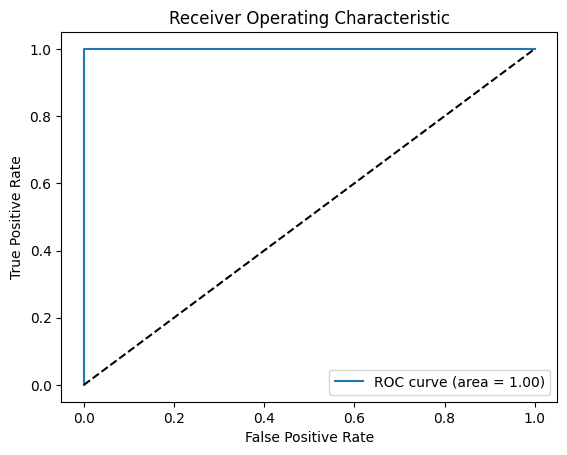

In [23]:
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()